<a href="https://colab.research.google.com/github/Nago625/midterm_exam_NLP/blob/main/GAOLUO_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install datasets nltk torch scikit-learn matplotlib --quiet

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

import re, random
import numpy as np
import pandas as pd
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
from collections import Counter, defaultdict
from datasets import load_dataset
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 49.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 33.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 80.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
# 테이터전처리
raw = load_dataset("amazon_polarity", split="train[:5000]")
df  = pd.DataFrame({
    "content": raw["content"],
    "label":   raw["label"]
})

df["content"] = df["content"].str.replace(r"<.*?>", " ", regex=True).str.strip()

stop_words = set(stopwords.words('english'))
def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-z0-9\s]', ' ', text)
    tokens = word_tokenize(text)
    return [t for t in tokens if t not in stop_words and len(t)>1]

df["tokens"] = df["content"].apply(preprocess)
print("样例 tokens:", df["tokens"].iloc[0])


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/6.81k [00:00<?, ?B/s]

train-00000-of-00004.parquet:   0%|          | 0.00/260M [00:00<?, ?B/s]

train-00001-of-00004.parquet:   0%|          | 0.00/258M [00:00<?, ?B/s]

train-00002-of-00004.parquet:   0%|          | 0.00/255M [00:00<?, ?B/s]

train-00003-of-00004.parquet:   0%|          | 0.00/254M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/117M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/3600000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/400000 [00:00<?, ? examples/s]

样例 tokens: ['sound', 'track', 'beautiful', 'paints', 'senery', 'mind', 'well', 'would', 'recomend', 'even', 'people', 'hate', 'vid', 'game', 'music', 'played', 'game', 'chrono', 'cross', 'games', 'ever', 'played', 'best', 'music', 'backs', 'away', 'crude', 'keyboarding', 'takes', 'fresher', 'step', 'grate', 'guitars', 'soulful', 'orchestras', 'would', 'impress', 'anyone', 'cares', 'listen']


In [ ]:
#2.TF–IDF 특성
documents = df["tokens"].tolist()
N = len(documents)

# 문서 빈도(DF) 계산
df_counts = defaultdict(int)
for doc in documents:
    for w in set(doc):
        df_counts[w] += 1

# 단어장 및 인덱스 매핑
vocab_tfidf    = sorted(df_counts.keys())
word2idx_tfidf = {w:i for i,w in enumerate(vocab_tfidf)}

# IDF 벡터 계산
idf = np.array([ np.log(N / (df_counts[w] + 1)) for w in vocab_tfidf])

# TF–IDF 행렬 생성
tfidf_matrix = np.zeros((N, len(vocab_tfidf)), dtype=np.float32)
for i, doc in enumerate(documents):
    cnt = Counter(doc)
    L = len(doc)
    for w, c in cnt.items():
        j = word2idx_tfidf[w]
        tf = c / L
        tfidf_matrix[i, j] = tf * idf[j]

print("TF–IDF 행렬 형태:", tfidf_matrix.shape)

TF–IDF 행렬 형태: (5000, 20569)


In [ ]:
# Skip-gram
# 3.1 단어장 및 (중심 단어, 주변 단어) 쌍 만들기
all_tokens = [tok for doc in documents for tok in doc]
vocab_size = 5000
top_vocab  = [w for w,_ in Counter(all_tokens).most_common(vocab_size)]
word2idx   = {w:i for i,w in enumerate(top_vocab)}

pairs = []
window = 2
for tokens in documents:
    idxs = [word2idx[t] for t in tokens if t in word2idx]
    for center_pos, c in enumerate(idxs):
        for pos in range(max(0, center_pos-window), min(len(idxs), center_pos+window+1)):
            if pos != center_pos:
                pairs.append((c, idxs[pos]))


In [ ]:
freq = np.array([ Counter(all_tokens)[w] for w in top_vocab ], dtype=np.float32)
freq = freq**0.75
unigram_dist = freq / freq.sum()

class SGNSDataset(Dataset):
    def __init__(self, pairs, K=5):
        self.pairs = pairs
        self.K = K
        self.dist = torch.tensor(unigram_dist)
    def __len__(self): return len(self.pairs)
    def __getitem__(self, idx):
        c, o = self.pairs[idx]
        negs = torch.multinomial(self.dist, self.K, replacement=True)
        return torch.tensor(c), torch.tensor(o), negs

In [ ]:
class SkipGramNS(nn.Module):
    def __init__(self, V, D):  # D will represent embed_dim here
        super().__init__()
        self.in_embed  = nn.Embedding(V, D)
        self.out_embed = nn.Embedding(V, D)
        nn.init.xavier_uniform_(self.in_embed.weight)
        nn.init.xavier_uniform_(self.out_embed.weight)
    def forward(self, c, o, negs):
        v_c = self.in_embed(c)                   # (B,D)
        u_o = self.out_embed(o)                  # (B,D)
        pos = (v_c*u_o).sum(1)                   # (B,)
        # Replace torch.logsigmoid with torch.nn.functional.logsigmoid
        pos_loss = -torch.nn.functional.logsigmoid(pos).mean()

        u_n = self.out_embed(negs)               # (B,K,D)
        neg_score = torch.bmm(u_n.neg(), v_c.unsqueeze(2)).squeeze(2)  # (B,K)
        # Replace torch.logsigmoid with torch.nn.functional.logsigmoid
        neg_loss  = -torch.nn.functional.logsigmoid(-neg_score).mean()
        return pos_loss + neg_loss

In [ ]:
# 3.4 학습
ds = SGNSDataset(pairs, K=5)
loader = DataLoader(ds, batch_size=512, shuffle=True)
model = SkipGramNS(vocab_size, 100)  # 임베딩 차원(embed_dim) 100을 직접 지정
opt   = optim.Adam(model.parameters(), lr=1e-3)

for epoch in range(1, 6):
    total = 0
    for c, o, negs in loader:
        opt.zero_grad()
        loss = model(c, o, negs)
        loss.backward()
        opt.step()
        total += loss.item()
    print(f"Epoch {epoch} Loss: {total/len(loader):.4f}")

# 3.5 학습된 단어 임베딩 추출
W_in = model.in_embed.weight.data.cpu().numpy()


Epoch 1 Loss: 0.3017
Epoch 2 Loss: 0.0055
Epoch 3 Loss: 0.0013
Epoch 4 Loss: 0.0005
Epoch 5 Loss: 0.0002


In [ ]:
def doc2vec(tokens):
    vecs = [W_in[word2idx[w]] for w in tokens if w in word2idx]
    return np.mean(vecs, axis=0) if vecs else np.zeros(W_in.shape[1])

X_sg = np.vstack(df["tokens"].apply(doc2vec))
print("Skip-gram 문서 벡터 형태:", X_sg.shape)


Skip-gram 문서 벡터 형태: (5000, 100)


=== TF–IDF 문서 벡터 분류 평가 ===
Accuracy: 0.8047
              precision    recall  f1-score   support

    Negative       0.77      0.90      0.83       787
    Positive       0.86      0.70      0.77       713

    accuracy                           0.80      1500
   macro avg       0.82      0.80      0.80      1500
weighted avg       0.81      0.80      0.80      1500

=== Skip-gram 문서 벡터 분류 평가 ===
Accuracy: 0.5247
              precision    recall  f1-score   support

    Negative       0.52      1.00      0.69       787
    Positive       0.50      0.00      0.01       713

    accuracy                           0.52      1500
   macro avg       0.51      0.50      0.35      1500
weighted avg       0.51      0.52      0.36      1500



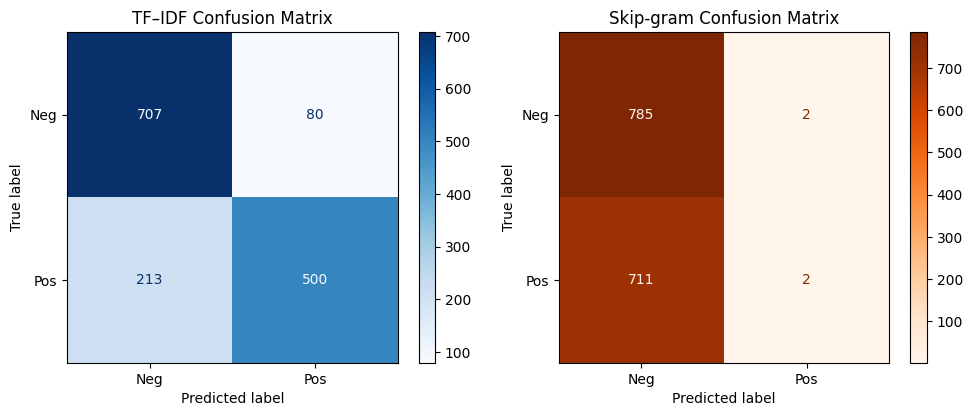

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 레이블 추출
y = df["label"].values  # 0=부정, 1=긍정

# 문서 벡터: X_tf (TF–IDF), X_sg (Skip-gram)
X_tf = tfidf_matrix
X_sg = X_sg  # 앞에서 계산 완료

# 학습/테스트 세트 분할
Xtr_tf, Xte_tf, ytr, yte = train_test_split(X_tf, y, test_size=0.3, random_state=42)
Xtr_sg, Xte_sg, _, _  = train_test_split(X_sg, y, test_size=0.3, random_state=42)

# 로지스틱 회귀 모델 학습
clf_tf = LogisticRegression(max_iter=1000).fit(Xtr_tf, ytr)
clf_sg = LogisticRegression(max_iter=1000).fit(Xtr_sg, ytr)

# 예측
yp_tf = clf_tf.predict(Xte_tf)
yp_sg = clf_sg.predict(Xte_sg)

# 정확도 및 분류 리포트 출력
print("=== TF–IDF 문서 벡터 분류 평가 ===")
print(f"Accuracy: {accuracy_score(yte, yp_tf):.4f}")
print(classification_report(yte, yp_tf, target_names=["Negative","Positive"]))

print("=== Skip-gram 문서 벡터 분류 평가 ===")
print(f"Accuracy: {accuracy_score(yte, yp_sg):.4f}")
print(classification_report(yte, yp_sg, target_names=["Negative","Positive"]))

# 혼동 행렬(Confusion Matrix) 시각화 비교
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
ConfusionMatrixDisplay.from_predictions(yte, yp_tf,
    display_labels=["Neg", "Pos"], ax=axes[0], cmap="Blues")
axes[0].set_title("TF–IDF Confusion Matrix")
ConfusionMatrixDisplay.from_predictions(yte, yp_sg,
    display_labels=["Neg", "Pos"], ax=axes[1], cmap="Oranges")
axes[1].set_title("Skip-gram Confusion Matrix")
plt.tight_layout()
plt.show()


In [ ]:
from numpy.linalg import norm

def retrieve_tfidf(query, top_k=5):
    qtoks = preprocess(query)
    # 쿼리 벡터 생성
    qcnt = Counter(qtoks)
    qvec = np.zeros(len(vocab_tfidf), dtype=np.float32)
    L = len(qtoks)
    for w, c in qcnt.items():
        if w in word2idx_tfidf:
            j = word2idx_tfidf[w]
            qvec[j] = (c/L) * idf[j]
    sims = cosine_similarity(tfidf_matrix, qvec.reshape(1, -1)).flatten()
    idxs = sims.argsort()[::-1][:top_k]
    return list(zip(idxs, sims[idxs]))

def retrieve_sg(query, top_k=5):
    qtoks = preprocess(query)
    qvec  = doc2vec(qtoks)
    sims  = X_sg.dot(qvec) / (norm(X_sg, axis=1) * norm(qvec) + 1e-8)
    idxs  = sims.argsort()[::-1][:top_k]
    return list(zip(idxs, sims[idxs]))

# 예시: 검색
query = "I love this product, it works great!"
print("\nTF–IDF top5:")
for i, score in retrieve_tfidf(query):
    print(f"{score:.4f}", df.loc[i, "content"][:80])

print("\nSkip-gram top5:")
for i, score in retrieve_sg(query):
    print(f"{score:.4f}", df.loc[i, "content"][:80])



TF–IDF top5:
0.3246 Great product! I have used many a skin care product and this was by far the best
0.3035 great boots even works great while walking up wet boards!!! buy this product you
0.2966 Love, love, love! Got this for a "beach read" & fell in love with the characters
0.2462 I received the product in a timely manner. It was as advertised. I have used it 
0.2449 this product is awesome. it hide all your secrets. I would recommend this produc

Skip-gram top5:
0.9995 great boots even works great while walking up wet boards!!! buy this product you
0.9995 My title says it all. Love this CD. Khachaturian is a great, great Artist and he
0.9995 This CD is a wonderful collection of Chumbawamba's music. It is consistently goo
0.9994 great product. my husband loves it. his old one was all rusted and well used, so
0.9994 Thanks for the great price and movie. It was really good. But of course I love t


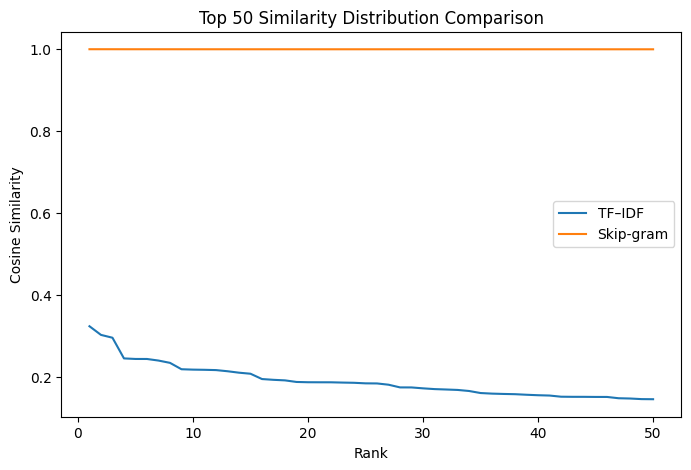

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from numpy.linalg import norm
import matplotlib.pyplot as plt

# Instead of using the score from retrieve_tfidf, we need to recreate the query vector
# using the same logic as in the retrieve_tfidf function.
def get_query_vector_tfidf(query):
    qtoks = preprocess(query)
    qcnt = Counter(qtoks)
    qvec = np.zeros(len(vocab_tfidf), dtype=np.float32)
    L = len(qtoks)
    for w, c in qcnt.items():
        if w in word2idx_tfidf:
            j = word2idx_tfidf[w]
            qvec[j] = (c / L) * idf[j]
    return qvec

# Get the query vector in TF-IDF space
qvec_tfidf = get_query_vector_tfidf(query)

# Project qvec into the Skip-gram embedding space
qvec_sg = doc2vec(preprocess(query))  # Re-use the doc2vec function to get the query vector

# Calculate cosine similarities
sims_tf = cosine_similarity(tfidf_matrix, qvec_tfidf.reshape(1, -1)).flatten()
sims_sg = X_sg.dot(qvec_sg) / (norm(X_sg, axis=1) * norm(qvec_sg) + 1e-8)  # Use qvec_sg

ranks = 50
tf_sorted = np.sort(sims_tf)[::-1][:ranks]
sg_sorted = np.sort(sims_sg)[::-1][:ranks]

plt.figure(figsize=(8, 5))
plt.plot(range(1, ranks + 1), tf_sorted, label="TF–IDF")
plt.plot(range(1, ranks + 1), sg_sorted, label="Skip-gram")
plt.xlabel("Rank")
plt.ylabel("Cosine Similarity")
plt.title("Top 50 Similarity Distribution Comparison")
plt.legend()
plt.show()

In [ ]:
# ── 7. 테스트: 문장을 입력하고 두 모델로 Top-5 검색 ────────────────────────
# 예시: I absolutely love this product and would buy it again.
def interactive_retrieval():
    query = input("테스트 문장을 입력하세요: ")
    print("\n===== TF–IDF 모델 Top 5 유사 문장 =====")
    for idx, score in retrieve_tfidf(query, top_k=5):
        print(f"[{idx:4d}] (score {score:.4f})  {df.loc[idx, 'content'][:100]}")

    print("\n===== Skip-gram 모델 Top 5 유사 문장 =====")
    for idx, score in retrieve_sg(query, top_k=5):
        print(f"[{idx:4d}] (score {score:.4f})  {df.loc[idx, 'content'][:100]}")

# 테스트 함수 호출
interactive_retrieval()


테스트 문장을 입력하세요: I absolutely love this product and would buy it again.

===== TF–IDF 모델 Top 5 유사 문장 =====
[ 659] (score 0.3042)  this product is awesome. it hide all your secrets. I would recommend this product to all women and m
[3683] (score 0.2955)  I was very happy with my product I absolutely love it!!! And it was brand new at a very reasonable p
[4361] (score 0.2579)  Love, love, love! Got this for a "beach read" & fell in love with the characters. Very well written 
[2169] (score 0.2269)  This CD is absolutely great. They have some great full sounding tracks. I had heard a few songs on t
[4215] (score 0.2244)  This is TERRIBLE. I have had this for 3 hours and it is already broken. It is absolutely NOT waterpr

===== Skip-gram 모델 Top 5 유사 문장 =====
[ 176] (score 0.9995)  It is very small compared to what i thought it would be, but even so it didn't work when we got it
[3100] (score 0.9995)  I did not like it very much...bought it because of the fact that my son went to high school 

In [ ]:
#The quality is terrible and I regret purchasing it.
def interactive_retrieval():
    query = input("테스트 문장을 입력: ")
    print("\n===== TF–IDF Model Top 5 Similar Sentences =====")
    for idx, score in retrieve_tfidf(query, top_k=5):
        print(f"[{idx:4d}] (score {score:.4f})  {df.loc[idx, 'content'][:100]}")

    print("\n===== Skip-gram Model Top 5 Similar Sentences =====")
    for idx, score in retrieve_sg(query, top_k=5):
        print(f"[{idx:4d}] (score {score:.4f})  {df.loc[idx, 'content'][:100]}")
interactive_retrieval()


테스트 문장을 입력: The quality is terrible and I regret purchasing it.

===== TF–IDF Model Top 5 Similar Sentences =====
[1955] (score 0.3056)  I can not be certain but I don't think the other reviewers and I saw the same movie. Acting was terr
[3024] (score 0.2712)  Transformers 3 is seriously a terrible terrible movie. yeah wow cool, special effects that i have se
[2985] (score 0.2153)  The plot was terrible. The acting was terrible. The effects were as good as the other ones. If you w
[4391] (score 0.2042)  Terrible book. I'm not into classics, so if you're like me, don't buy it. If you like them, buy it.
[3725] (score 0.1957)  -Excellent little camcorder.-Very impressed with its features.-Easy to transfer your moviesto a comp

===== Skip-gram Model Top 5 Similar Sentences =====
[2823] (score 0.9993)  My negative comments have nothing to do with the content as Hodge wrote it, which is excellent. But 
[3074] (score 0.9993)  I grew up on transformers and, quite frankly, the 15 seconds of 'me

In [ ]:
#What a fantastic experience—I’m totally impressed!
def interactive_retrieval():
    query = input("테스트 문장을 입력: ")
    print("\n===== TF–IDF Model Top 5 Similar Sentences =====")
    for idx, score in retrieve_tfidf(query, top_k=5):
        print(f"[{idx:4d}] (score {score:.4f})  {df.loc[idx, 'content'][:100]}")

    print("\n===== Skip-gram Model Top 5 Similar Sentences =====")
    for idx, score in retrieve_sg(query, top_k=5):
        print(f"[{idx:4d}] (score {score:.4f})  {df.loc[idx, 'content'][:100]}")
interactive_retrieval()


테스트 문장을 입력: What a fantastic experience—I’m totally impressed!

===== TF–IDF Model Top 5 Similar Sentences =====
[4381] (score 0.2444)  Well, it was very romantic and very imaginative, totally complicated and fantastic to analyze, very 
[2198] (score 0.2070)  Totally hated this book. Now, don't get me wrong, I love LJS and most of her books. Actually, all of
[4282] (score 0.2002)  Glenn Jones has one of the most fabulous voices of all time. He's right there with Luther, Marvin an
[3640] (score 0.1923)  This is a crap movie. Totally unbelievable, totally depraved. A piece of Hollywood junk. Don't bothe
[3079] (score 0.1890)  I could watch this movie over and over and over again. The graphics were totally awesome. A must see

===== Skip-gram Model Top 5 Similar Sentences =====
[ 287] (score 0.9991)  Generally speaking a great book if you are not familiar with management accounting and turning heaps
[1612] (score 0.9991)  I had experience of RTS games (Total Annihilation, Age of Empires a

In [ ]:
#The battery lasts around eight hours on a single charge.
def interactive_retrieval():
    query = input("테스트 문장을 입력: ")
    print("\n===== TF–IDF Model Top 5 Similar Sentences =====")
    for idx, score in retrieve_tfidf(query, top_k=5):
        print(f"[{idx:4d}] (score {score:.4f})  {df.loc[idx, 'content'][:100]}")

    print("\n===== Skip-gram Model Top 5 Similar Sentences =====")
    for idx, score in retrieve_sg(query, top_k=5):
        print(f"[{idx:4d}] (score {score:.4f})  {df.loc[idx, 'content'][:100]}")
interactive_retrieval()


테스트 문장을 입력: The battery lasts around eight hours on a single charge.

===== TF–IDF Model Top 5 Similar Sentences =====
[1137] (score 0.3183)  As others have experienced, mine starts a a charge/battery/charge cycle that is maddening, and proba
[1846] (score 0.2412)  easy set up, working great - no complaints to far. it was nice to find one so cheap! we'll see how l
[1221] (score 0.2275)  Short and simple: This charger did not charge my laptop's battery unless the computer was either off
[ 942] (score 0.2164)  Eight Crazy Nights is the thrid back to back unfunny movie(following Little Nicky and Mr Deeds) that
[1687] (score 0.2059)  This is the same set we have had for twenty five years. Its reasonably priced and I hope it lasts as

===== Skip-gram Model Top 5 Similar Sentences =====
[1168] (score 0.9996)  This charger only lacks 1 feature from the Apple model: it lack's Apple's green & orange light aroun
[1227] (score 0.9996)  Like every other Mac user, I think the replacement power cord